# Grundlagen Neuronale Netze - einfache Operationen

https://bootcamp.codecentric.ai

In diesem Notebook wollen wir das einfache Beispiel aus dem Video nachvollziehen. 

Wir:
- definieren einen Input Tensor (aus einem 28x28 Pixel Bild von MNIST)
- wir normalisieren die Werte des Bildes
- wir definieren Matrizen mit Gewichten, die wir lernen wollen
- wir kombinieren Matrix Multiplikationen und Aktivierungsfunktionen, um aus einem Input mit 784 Pixeln einen Output mit 10 Werten zu erhalten
- wir definieren ein Label
- (wir optimieren die Gewichte, damit sie zum Label passen - kleiner Vorausblick auf kommende Videos)

Das folgende neuronale Netz ist keine besonders sinnvolle Architektur. Auch das Training mit nur einem Bild macht natürlich wenig Sinn. Es geht darum zu verstehen, welche Rechenoperationen "unter der Haube" eines neuronalen Netzes stattfinden. **Daher ist das ganze (hier) noch stark vereinfacht.**

Hier noch einmal das Bild, was wir versuchen in Code nachzuvollziehen:

![simple nn](simple_nn.png)

Beispiel mit PyTorch

Zunächst ein paar benötigte Imports:

In [44]:
%matplotlib inline

import torch
import torchvision
import math

from torchvision import transforms
from matplotlib import pyplot

Folgender Tensor ist die interne Darstellung eines Bildes.

Es ist ein 28x28 Pixel Matrix mit Zahlenwerten von 0-255. 

(0 = schwarz, 255 = weiss, dazwischen Graustufen)

In [45]:
img = torch.tensor(
       [[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253,
         253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253, 253,
         253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253, 253,
         198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253, 205,
          11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,  90,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253, 190,
           2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190, 253,
          70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35, 241,
         225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  81,
         240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39, 148,
         229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221, 253,
         253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253, 253,
         253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253, 195,
          80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,  11,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0, 136, 253, 253, 253, 212, 135, 132,  16,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]],
       dtype=torch.float)

So kann man sich die Dimensionen des Tensors anschauen:

In [46]:
img.size()

torch.Size([28, 28])

Und so sieht es aus, wenn man die Zahlen als Bild interpretiert (eine Zahl 5 aus dem MNIST Datensatz):

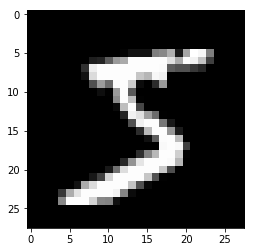

In [47]:
pyplot.imshow(img, cmap="gray")

Jetzt klopfen wir den Tensor flach. Aus einer 28 x 28 Matrix wird ein Vektor mit 784 "Input Pixeln". Das sind die gleichen Zahlenwerte - nur nicht mehr in 28 Reihen sondern alle in einer Reihe aneinander gehängt.

In [48]:
input_tensor = img.flatten()

In [49]:
input_tensor.size()

torch.Size([784])

Jetzt schauen wir uns mal den Wert an Stelle 180 an:

In [50]:
input_tensor[180]

tensor(170.)

Der Wert beträgt 170 ...

... nun schauen wir an was der größte Wert in dem Vektor ist:

In [51]:
max(input_tensor)

tensor(255.)

Wie zu erwarten war, ist es 255 (weiß - sicher sind einige Pixel in dem Bild weiß - größere Zahlen kann es bei einem solchen Bild nicht geben).

Jetzt machen wir eine einfache "Normalisierung" und teilen alle Werte des Vektors durch 255.

Damit ändern wir den Zahlenbereich im Vektor von 0-255 auf 0-1. Mit diesem Schritt kann man Probleme beim Training verringern - vor allem bei tieferen neuronalen Netzen wird das sehr wichtig.

In [52]:
normalized_input_tensor = input_tensor / 255

Der Wert an der Stelle 180 (den wir vorher schon angesehen haben) ist jetzt 0.6667

Die Zahlen stehen aber noch im gleichen Verhältnis 0,66 ist 2/3 von 1 sowie 170 2/3 von 255 ist.

In [53]:
normalized_input_tensor[180]

tensor(0.6667)

In [54]:
max(normalized_input_tensor)

tensor(1.)

Wie zu erwarten ist die größte Zahl im Vektor jetzt 1

Jetzt initialisieren wir unsere erste Weight Matrix mit Parametern, die gelernt werden können. Anders als im Video wählen wir nicht 784x3 sondern 784x20 - im Video wurde nur eine kleinere Zahl gewählt, damit es auf eine Folie passt und übersichtlicher aussieht.

Die Zahlen sind zunächst (kleine) Zufallszahlen. (was requires_grad bedeutet überspringen wir an dieser Stelle - dazu kommen wir später)

In [90]:
weights_tensor = torch.randn((784, 20)) / math.sqrt(784)
weights_tensor.requires_grad_()

tensor([[ 0.0656,  0.0342, -0.0048,  ...,  0.0504, -0.0240, -0.0235],
        [-0.0566,  0.0155,  0.0491,  ...,  0.0247, -0.0079,  0.0358],
        [-0.0425, -0.0498,  0.0020,  ..., -0.0059, -0.0416, -0.0090],
        ...,
        [-0.0171, -0.0070,  0.0356,  ...,  0.0129,  0.0382,  0.0459],
        [-0.0407, -0.0839, -0.0490,  ..., -0.0090,  0.0100,  0.0325],
        [-0.0334,  0.0194, -0.0490,  ...,  0.0641, -0.0237,  0.0271]],
       requires_grad=True)

In [91]:
weights_tensor.size()

torch.Size([784, 20])

Jetzt berechnen wir wie im Video zuvor einige "Activations". Dazu machen wir eine Matrix-Multiplikation mit dem Input @ weights

In [92]:
first_activation = normalized_input_tensor @ weights_tensor

In [93]:
first_activation

tensor([-0.4316,  0.1518,  0.4564, -0.0504, -0.0354,  0.4931,  0.4556, -0.1883,
        -0.1547,  0.1315,  0.1643, -0.2995,  0.8672, -0.3522, -0.3659,  0.1599,
         0.1575, -0.2205, -0.2636,  0.0573], grad_fn=<SqueezeBackward3>)

Das ist das Ergebnis unserer ersten Matrix-Multiplikation.

Anders als im Video Beispiel hat diese jetzt auch wieder eine Size von 20, da wir ja eine größere Weight Matrix gewählt haben.

In [94]:
first_activation.size()

torch.Size([20])

Jetzt kommt die Aktivierungs-Funktion, um auch nicht lineare Zusammenhänge lernen zu können. 
Im Prinzip setzt diese alle negativen Activations aus dem vorigen Schritt auf 0.

In [95]:
second_activation = first_activation.relu()

In [96]:
second_activation

tensor([0.0000, 0.1518, 0.4564, 0.0000, 0.0000, 0.4931, 0.4556, 0.0000, 0.0000,
        0.1315, 0.1643, 0.0000, 0.8672, 0.0000, 0.0000, 0.1599, 0.1575, 0.0000,
        0.0000, 0.0573], grad_fn=<ReluBackward0>)

Jetzt initialisieren wir die zweite Weight Matrix (wie im Video Beispiel). Hier müssen wir jetzt auch wieder die Size von 3 auf 20 anpassen, damit die Matrix-Multiplikationen zusammen passen. Nach wie vor wollen wir aber eine Output Größe von 10 haben (in unserem Beispiel wollen wir ja Zahlen von 0-9) vorhersagen.

In [97]:
more_weights_tensor = torch.randn((20, 10)) / math.sqrt(20)
more_weights_tensor.requires_grad_()

tensor([[ 0.0797, -0.1833, -0.5184,  0.0186, -0.3187, -0.0950, -0.0871,  0.0958,
          0.2110, -0.0855],
        [-0.0806, -0.0119,  0.0253, -0.2516, -0.1614, -0.0086,  0.1103,  0.1938,
         -0.0857, -0.5184],
        [ 0.0609,  0.2804, -0.1119, -0.3617,  0.5554, -0.0527, -0.2334,  0.0757,
          0.1637,  0.0369],
        [-0.1400, -0.3254,  0.2593, -0.1850, -0.3902,  0.3106, -0.3367, -0.0212,
          0.1835,  0.0692],
        [-0.0138, -0.0180,  0.0535, -0.1926,  0.0657,  0.0492,  0.0712,  0.0954,
          0.4357,  0.1249],
        [ 0.1178,  0.1734,  0.0588,  0.4374,  0.1805,  0.0251, -0.3083,  0.3585,
         -0.1906,  0.5671],
        [ 0.2936, -0.1956, -0.1607, -0.1308,  0.2795,  0.0351,  0.3279, -0.0726,
         -0.1633,  0.0675],
        [-0.0543, -0.2475,  0.0963,  0.2062,  0.0639, -0.4213,  0.0014,  0.2473,
         -0.1331,  0.0445],
        [ 0.3618,  0.0155,  0.1939,  0.3116, -0.0055, -0.0990,  0.2023, -0.3053,
          0.0453, -0.1513],
        [-0.1117, -

... eine weitere Matrix-Multiplikation ...

In [98]:
output = second_activation @ more_weights_tensor

In [99]:
output

tensor([ 0.4509, -0.2152,  0.4255,  0.2235,  0.5679,  0.0494, -0.1512,  0.5685,
        -0.0587,  0.3241], grad_fn=<SqueezeBackward3>)

In [100]:
output.size()

torch.Size([10])

Und das ist jetzt erstmal unser Output. Der Vektor hat die richtige Dimension. Die Zahlen darin sind bis hierhin erstmal **völlig bedeutungslos**.

Wir haben einmal das Modell mit Zufallszahlen durchgerechnet und geschaut, was am Ende raus kommt -> Zufallszahlen.

### Label definieren

An dieser Stelle definieren wir jetzt ein Label. Das Label ist das was wir vom neuronalen Netz erwarten. 

Wenn ich vorne ein Bild einer 5 rein gebe, dann soll folgendes herauskommen:

In [101]:
label = torch.tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=torch.float)

Diese verbreitete Form eines Labels nennt man auch "one hot encoded vector". Es ist Vektor der verschiedene Klassen abbilden kann - der Vektor an der Stelle 0 ist die Wahrscheinlichkeit für eine 0. Der Vector an der Stelle 5 ist die Wahrscheinlichkeit für eine 5 etc. (Es könnte aber auch etwas völlig anderes bedeuten - z.B. Stelle 0 = Katze, Stelle 3 = Hund etc.)

Da wir ja ein Bild einer 5 betrachten, soll also das label[5] = 1 und alles andere 0 sein.

Jetzt fügen wir dem Output noch eine weitere Aktivierungs-Funktion hinzu und haben unsere "prediction" - also unsere Vorhersage. Diese bringt die Zahlen Werte in einen Bereich von 0-1 (warum ist an dieser Stelle nicht relevant - wir tun es einfach :) )

In [102]:
prediction = output.sigmoid()

Hier jetzt die aktuelle Vorhersage des Modells (gerundet, dass man es besser lesen kann):

In [103]:
prediction.round()

tensor([1., 0., 1., 1., 1., 1., 0., 1., 0., 1.], grad_fn=<RoundBackward>)

### Loss Funktion

Unsere Loss Funktion soll uns den Fehler zwischen unserer prediction und dem label berechnen. Wir verwenden eine bestehende pytorch Funktion. (Warum genau diese, ist an dieser Stelle auch noch nicht relevant).

In [104]:
loss_func = torch.nn.functional.binary_cross_entropy

Nun berechnen wir einmal beispielhaft den aktuellen Loss, also den Fehler oder den "Abstand" zwischen unserer prediction und dem label. 

In [105]:
loss_func(prediction, label)

tensor(0.8130, grad_fn=<BinaryCrossEntropyBackward>)

Das ist unser loss - was sagt uns das? Erstmal noch gar nichts (auch hier sind wir immer bei völlig aussagslosen Zufallszahlen.)

Jetzt machen wir eine "manuelle Vorhersage". Wir definieren einfach eine prediction wie sie uns gefällt. Sind bei dieser prediction mehr Einsen und Nullen an der richtigen Stelle sollte der folgende Loss kleiner weren - ansonsten größer:

In [106]:
manual_prediction = torch.tensor([0, 0, 0, 0, 0, 1, 0, 1, 1, 0], dtype=torch.float)

In [107]:
loss_func(manual_prediction, label)

tensor(5.5262)

Was passiert wenn alle Zahlen richtig vorhergesagt werden? Wenn unsere prediction gleich dem label ist?

In [108]:
loss_func(label, label)

tensor(0.)

... der Loss geht gegen 0.

# Modell optimieren

(Kleiner Vorausblick)

Jetzt optimieren wir in ein paar Schritten unsere weight so, dass die prediction möglichst nah an das label heran kommt. Das ist das (vereinfachte) Prinzip, wie neuronale Netze lernen. Wir werden es in einem folgenden Video noch genauer betrachten.

Daher gehe ich einfach die Schritte durch, ohne diese detailliert zu erkläeren.

Zunächst berechnen wir den Loss als Tensor.

In [109]:
loss = loss_func(prediction, label)
loss

tensor(0.8130, grad_fn=<BinaryCrossEntropyBackward>)

Wir fordern pytorch dazu auf eine "Backpropagation" zu machen und die Gradienten für die weight Matrizen zu ermitteln.

In [110]:
loss.backward()

In [111]:
more_weights_tensor.grad.data

tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0093,  0.0068,  0.0092,  0.0084,  0.0097, -0.0074,  0.0070,  0.0097,
          0.0074,  0.0088],
        [ 0.0279,  0.0204,  0.0276,  0.0254,  0.0291, -0.0223,  0.0211,  0.0291,
          0.0222,  0.0265],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0301,  0.0220,  0.0298,  0.0274,  0.0315, -0.0240,  0.0228,  0.0315,
          0.0239,  0.0286],
        [ 0.0278,  0.0203,  0.0276,  0.0253,  0.0291, -0.0222,  0.0211,  0.0291,
          0.0221,  0.0264],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0080,  

### Model definieren

Hier definieren wir einfach nochmal die gleichen Berechnungen wir zuvor - nur in einer Funktion, so dass wir sie in einer Schleife immer wieder aufrufen können.

In [112]:
def model(x):
    return ( ((x @ weights_tensor).relu()) @ more_weights_tensor).sigmoid()

In [113]:
model(normalized_input_tensor)

tensor([0.6108, 0.4464, 0.6048, 0.5556, 0.6383, 0.5123, 0.4623, 0.6384, 0.4853,
        0.5803], grad_fn=<SigmoidBackward>)

Wir machen eine prediction mit dem aktuellen Modell für unseren input Tensor (das Bild der 5):

In [114]:
new_pred = model(normalized_input_tensor)
new_pred

tensor([0.6108, 0.4464, 0.6048, 0.5556, 0.6383, 0.5123, 0.4623, 0.6384, 0.4853,
        0.5803], grad_fn=<SigmoidBackward>)

... ermitteln den loss (als den Fehler zwischen Vorhersage und label) und machen eine backpropagation

In [115]:
loss = loss_func(new_pred, label)
loss.backward()

Jetzt verwenden wir die Gradienten, um die Weights ein kleines bisschen in die richtige Richtung zu optimieren:

In [116]:
lr = 0.1
with torch.no_grad():
    weights_tensor -= weights_tensor.grad * lr
    more_weights_tensor -= more_weights_tensor.grad * lr
    weights_tensor.grad.zero_()
    more_weights_tensor.grad.zero_()

In [117]:
new_pred = model(normalized_input_tensor)
loss_func(new_pred, label)

tensor(0.6261, grad_fn=<BinaryCrossEntropyBackward>)

... und wir sehen, dass unser Fehler tatsächlich etwas kleiner geworden ist.

## iterative Optimierung

Wenn wir diese einfachen Optimierungsschritte jetzt ganz oft aufrufen, dann werden die Gewichte immer mehr so angepasst, dass sich die prediction immer mehr dem label annähert (der loss kleiner wird):

In [118]:
lr = 0.1
for i in range(1000):
    new_pred = model(normalized_input_tensor)
    loss = loss_func(new_pred, label)
    loss.backward()

    with torch.no_grad():
        weights_tensor -= weights_tensor.grad * lr
        more_weights_tensor -= more_weights_tensor.grad * lr
        weights_tensor.grad.zero_()
        more_weights_tensor.grad.zero_()

    if (i % 100 == 0): print("Loss: ", loss_func(new_pred, label).item())

Loss:  0.6261407136917114
Loss:  0.004133186303079128
Loss:  0.0016082196962088346
Loss:  0.0009595596930012107
Loss:  0.0006722664693370461
Loss:  0.0005125728785060346
Loss:  0.0004117612261325121
Loss:  0.0003426993207540363
Loss:  0.0002926323504652828
Loss:  0.00025476646260358393


Nach der Optimierung sieht unser Vorhersage nun so aus: 

In [119]:
model(normalized_input_tensor)

tensor([2.4686e-04, 2.1183e-04, 2.6229e-04, 2.4961e-04, 2.0450e-04, 9.9978e-01,
        2.5082e-04, 2.5847e-04, 2.5807e-04, 8.9158e-05],
       grad_fn=<SigmoidBackward>)

Mit dieser Schreibweise ist auf einen ersten Blick erstmal nicht viel anzufangen. Schauen wir uns an welche Zahl am größten ist:

In [120]:
model(normalized_input_tensor).argmax()

tensor(5)

Die Zahl an der Stelle 5 ist die Größte. Also die 5, die wir vorhersagen wollen.

Runden wir die Zahlen auf und ab:

In [121]:
model(normalized_input_tensor).round()

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], grad_fn=<RoundBackward>)

...sieht man deutlich besser, dass wir die Gewichte so optimiert haben, dass die prediction für die Pixel-Werte einer 5 zu dem gleichen Output Vector führen wir unser Label, das wir definiert haben.

# Fazit

Was wir hier gemacht haben, war ein vereinfachtes Beispiel dafür, welche Rechenoperationen in einem neuronalen Netz stattfinden. Wir haben nur mit einem Bild "trainiert" und die Gewichte auf dieses Bild "overfittet" (das war sicherlich kein sinnvolles Training). Die Architektur dieses Netzes ist nicht unbedingt sinnvoll (- man muss solche Architekturen auch nicht unbedingt selbst erfinden können).

ABER: Das was wir hier gesehen haben sind die Building Blocks von neuronalen Netzen. Das passiert unter der Haube. Matrix-Multiplikationen, Aktivierungsfunktionen, Ermittlung des Loss/Fehlers und Optimierungs-Schritte, um die Weights anzupassen - mehr nicht. Für moderne Deep Learning Verfahren und "richtiges Training" mit großen Datenmengen sind noch ein paar mehr Dinge nötig. Wir wollen ja nicht eine 5 "auswändig lernen" sondern generalisieren - trotzdem behalte dieses einfache Beispiel im Hinterkopf.
